In [6]:
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import math

In [7]:
##############################################################################################
# Read in train and test synthetic data
def load_synthetic_data():
        print('Reading synthetic data ...')
        train_x = np.loadtxt('../../Data/Synthetic/data_train.txt', delimiter = ',', dtype=float)
        train_y = np.loadtxt('../../Data/Synthetic/label_train.txt', delimiter = ',', dtype=float)
        test_x = np.loadtxt('../../Data/Synthetic/data_test.txt', delimiter = ',', dtype=float)
        test_y = np.loadtxt('../../Data/Synthetic/label_test.txt', delimiter = ',', dtype=float)

        return (train_x, train_y, test_x, test_y)
###############################################################################################

In [8]:
################################################################
# Compute MSE
def compute_MSE(y, y_hat):
        # mean squared error
        return np.mean(np.power(y - y_hat, 2))
################################################################

In [9]:
train_x, train_y, test_x, test_y = load_synthetic_data()

Reading synthetic data ...


In [52]:
def basis_expansion(x,i):
    basis = []
    for j in range(len(x)):
        row = []
        row.append(1)
        for k in range(1,i+1):
            row.append(math.sin(k*0.5*x[j]))
            row.append(math.cos(k*0.5*x[j]))
        basis.append(row)
    return basis

In [70]:
power = 10

In [71]:
#getting basis expanded train_x vector
new_x = basis_expansion(train_x,power)

In [72]:
ridge = Ridge(alpha=0.1)

In [73]:
ridge.fit(new_x,train_y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [74]:
#getting basis expanded test_x vector
new_test = basis_expansion(test_x,power)

In [75]:
#calculating predictions
predictions = ridge.predict(new_test)

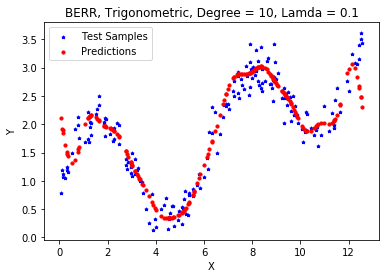

In [76]:
#plotting comparison
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.scatter(test_x,test_y, s=10, c='b', marker="*", label='Test Samples')
ax1.scatter(test_x,predictions, s=10, c='r', marker="o", label='Predictions')
plt.legend(loc='upper left')
plt.title('BERR, Trigonometric, Degree = ' + str(power) + ', Lamda = 0.1')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [77]:
compute_MSE(test_y,predictions)

0.0925751743364409